#Q1

$
Y = |Z| \\
Z \sim Normal(0, 1) \\
\implies f_Z (z) = \dfrac{1}{\sqrt{2\pi}} e^ {-z^2/2 } \\
\implies F_Y (y) = P(|Z| \leq y) = P(-y \leq Z \leq y) \\
\qquad = F_Z(y) - F_Z(-y) \\
Differentiating \; both \; sides,\\
f_Y(y) = 2 f_Z(y) =  \sqrt{\dfrac{2}{\pi}} e^ {-y^2/2 } \\
E(Y) = \int_0^\infty  y \sqrt{\dfrac{2}{\pi}} e^ {-y^2/2 } \: \mathrm{d}y \\
\qquad = \sqrt{\dfrac{2}{\pi}} \\
E(Y^2) = E(Z^2) = {\sigma_Z^2} + {\mu_Z^2} = 1 \\
E(Y^3) = \int_0^\infty  y^3 \sqrt{\dfrac{2}{\pi}} e^ {-y^2/2 } \: \mathrm{d}y \\
\qquad = \int_0^\infty  2t \sqrt{\dfrac{2}{\pi}} e^{-t} \: \mathrm{d}t \\
\qquad = 2\sqrt{\dfrac{2}{\pi}}
$

#Q2


The LoTUS states:

$
E(g(X)) = \sum g(x)f_X(x) \\
Given \: that \: X \sim Poisson(\lambda) \\
\implies f_X(x) = e^{-\lambda}{\lambda}^x/x! \\
To \: prove \: that \: E(Xg(X)) = \lambda E(g(X + 1)) \\
= \sum_{x=0}^{∞} xg(x) \dfrac{e^{-\lambda}{\lambda}^x}{x!} \\
= \lambda\sum_{x=0}^{∞} g(x) \dfrac{e^{-\lambda}{\lambda}^{x - 1}}{(x - 1)!} \\
= \lambda\sum_{t=-1}^{∞} g(t + 1) \dfrac{e^{-\lambda}{\lambda}^t}{t!} \\
= \lambda\sum_{t=0}^{∞} g(t + 1) \dfrac{e^{-\lambda}{\lambda}^t}{t!} \\
\qquad (as \: (-1)! \to -∞, the \; t = -1 \: term \: is \: 0.) \\
= \lambda E(g(X+1))\\
LHS = RHS, \; hence \; proven.
$

---

$
E(X^3) = E(XX^2) = λE(X^2 + 2X + 1) \\
\tiny{Using \: (E(X^2) = E(XX) = \lambda E(X + 1) = \lambda E(X) + \lambda)} \\
\qquad = {\lambda}^3 + 4\lambda + \lambda \\
$

#Q3

$
T_1 \sim Exp(\lambda_1) \\
T_2 \sim Exp(\lambda_2) \\
P(T_1 < T_2) = \int_{0}^{∞} \int_{t_1}^{∞} f_{T_1}(t_1)f_{T_2}(t_2) \; \mathrm d{t_2}d{t_1} \\
= \lambda_1 \lambda_2 \int_{0}^{∞} \int_{t_1}^{∞} e^{-\lambda_1 t_1 -\lambda_2 t_2} \; \mathrm d{t_2}d{t_1} \\
= -\lambda_1 \int_{0}^{∞} e^{-({\lambda_1 +\lambda_2})t_1} \; \mathrm d{t_1} \\
= \dfrac{\lambda_1}{\lambda_1 + \lambda_2}
$

#Q4

Assuming that one message is just one bit; either 0 or 1, with each having equal likelihood.

Then, the sender's bit has 0.5 chance of being 0 or 1, to which we add $X \sim Normal(0, \sigma^2)$. If after this, the result is >0.5, it is interpreted by the reciever as 1, else 0.

$
P(Correct \; Interpretation) = P(S=0)P(\dfrac{R=0}{S=0}) + P(S=1)P(\dfrac{R=1}{S=1}) \\
= \dfrac{1}{2}[F_X(\dfrac{1}{2}) + 1 - F_X(-\dfrac{1}{2})] \\
=\Phi(\dfrac{1}{2\sigma})
$

$\implies$ When $\sigma \to 0$, $\Phi(\dfrac{1}{2\sigma}) \to \Phi(∞) = 1$ which makes sense as a variance of 0 implies no random change at all, and since the mean is already 0, the bit remains unchanged in all scenarios.

#Q5

- Four distributions, Exponential, Binomial, Poisson and a mixed Normal-Uniform.
- We generate 1000 arrays of random values of size 80 for each distribution and a 1000 more, with size 30.
- Then we find their means.
- According to the CLT, as the number of samples increases, their distribution should tend towards a normal distribution.
- To check we plot them and and check the difference between the sample mean and population mean (and std. dev.).

In [ ]:
#Total 8 arrays.
import numpy as np

observed_number = [80, 30]
exp_means = np.zeros((2, 1000))
binom_means = np.zeros((2, 1000))
pois_means = np.zeros((2, 1000))
mix_means = np.zeros((2, 1000))

for i in range(2):
  for j in range(1000):
    exp_means[i][j] = (sum(np.random.default_rng().exponential(10, observed_number[i])) / observed_number[i])
    binom_means[i][j] = (sum(np.random.default_rng().binomial(100, 0.7, observed_number[i])) / observed_number[i])
    pois_means[i][j] = (sum(np.random.default_rng().poisson(10, observed_number[i])) / observed_number[i])
    mix_means[i][j] = np.random.default_rng().choice([(sum(np.random.default_rng().normal(50, 10, observed_number[i])) / observed_number[i]), (sum(np.random.default_rng().uniform(20, 80, observed_number[i])) / observed_number[i])])

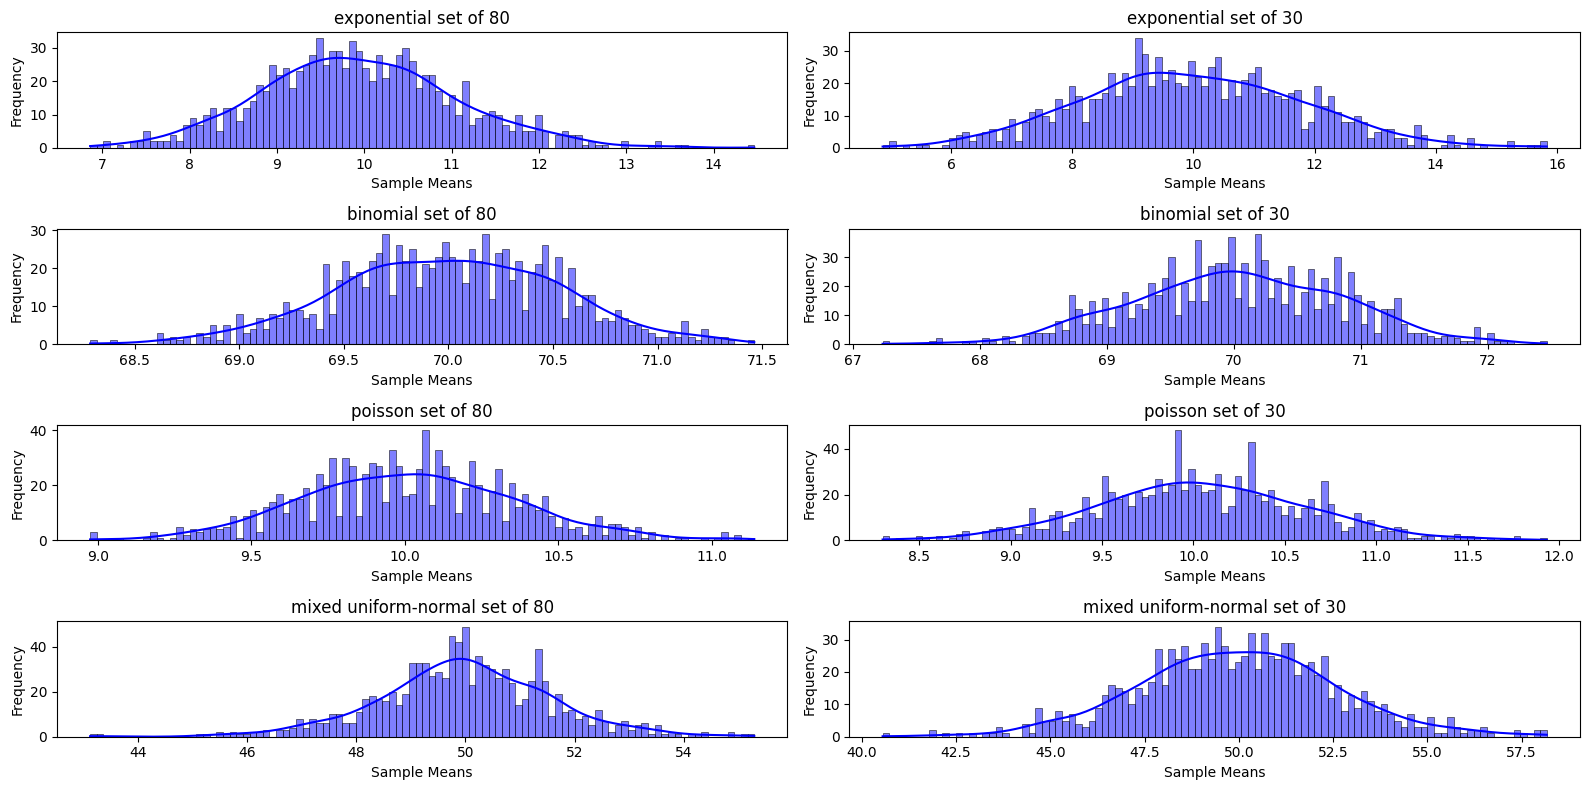

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titles = ["exponential set of 80", "exponential set of 30",
          "binomial set of 80", "binomial set of 30",
          "poisson set of 80", "poisson set of 30",
          "mixed uniform-normal set of 80", "mixed uniform-normal set of 30"]

sets = [exp_means[0], exp_means[1],
        binom_means[0], binom_means[1],
        pois_means[0], pois_means[1],
        mix_means[0], mix_means[1]]

fig, axes = plt.subplots(4, 2, figsize = (16, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
  sns.histplot(sets[i], bins = 100, color='blue', edgecolor='black', kde = True, ax = ax)
  ax.set_title(titles[i])
  ax.set_xlabel("Sample Means")
  ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
from statistics import NormalDist
alpha = 0.05
sample_mean = 780
sample_std_dev = 50
n = 50

# Hypothesis is that the lifetime is above 800 hours, ie the true/population mean is 800 hours

z = (sample_mean - 800) / (sample_std_dev / np.sqrt(n))
print(z)
# Two tailed test since lifetime is either =800 or simply not. So we calculate P(|Z| > |z| | H_0) = p.
p = 2*(1 -NormalDist(mu = 0, sigma = 1).cdf(abs(z)))
print(p)
print("Lifetime is not 800 hours") if p < alpha else print("Lifetime is 800 hours")

-2.8284271247461903
0.004677734981047177
Lifetime is not 800 hours
